# Итоговый проект

Данный модуль является заключительным для обязательных глав курса по SageMath. В рамках итогового проекта студент должен будет выполнить одну объемную задачу, покрывающую в той или иной степени все рассмотренные темы: от символьных вычислений и графиков, до основ линейной алгебры в Sage. Прошу обратить внимание, что Ваша работа будет проверяться такими же студентами, как и Вы, поэтому:
1. Грамотно оформляйте свою работу, пишите подробные комментарии, что вы делаете (либо же вставляйте в Ваше копию блокнота блоки Markdown, содержащие пояснения). 
2. Работа будет считаться выполненной только после того, как автор работы проверит не менее 3-х работ других студентов.

## Условие задания

В данной работе Вам будет необходимо привести к каноническому виду уравнения кривой и поверхности второго порядка по данному Вам варианту. Просьба, после этого блока вставить блок Markdown с указанием номера Вашего варианта. План работы над заданием:
1. Задать уравнения кривой второго порядка и поверхности второго порядка в символьном виде.
2. Построить графики заданной кривой и поверхности. Обратить внимание на расположение координаты 0, 0.
3. Привести аналитически (например, методом ортогонального преобразования) квадратичные формы, описывающие кривую и поверхность второго порядка к каноническому виду.
4. Построить графики приведенных к каноническому виду кривой и поверхности второго порядка. 
5. Сделать выводы, оформить блокнот.

## Вариант №5
Задана следующая кривая: 
    $$ y^2 - x^2 / 10 - 2xy - x - y = 0 $$
И поверхность
    $$ 2x^2 + 11y^2 + 11z^2 + 12xy + 12xz + 24yz = 0 $$

## Пункт №1.
_Задать уравнения кривой второго порядка и поверхности второго порядка в символьном виде_

In [24]:
# Инициализируем используемые переменные в уравнениях
var('x y z')

# Кривая 
curve = y^2 + x^2/10 - 2*x*y - x - y == 0

# Поверхность 
surface = 2*x^2 + 11*y^2 + 11*z^2 + 12*x*y + 12*x*z + 24*y*z == 0

# Вывод в консоль
print("Формула заданной кривой: {}".format(curve))
print("Формула заданной поверхности: {}".format(surface))

Формула заданной кривой: 1/10*x^2 - 2*x*y + y^2 - x - y == 0
Формула заданной поверхности: 2*x^2 + 12*x*y + 11*y^2 + 12*x*z + 24*y*z + 11*z^2 == 0


## Пункт №2.
_Построить графики заданной кривой и поверхности. Обратить внимание на расположение координаты (0,0)._

Сперва построим график заданной прямой

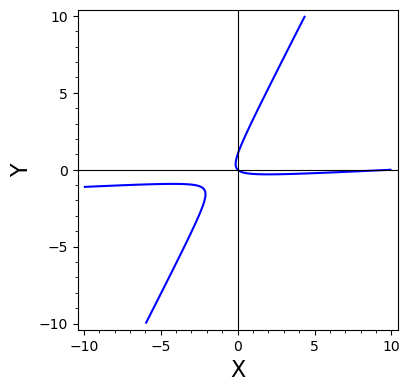

In [25]:
# Зададим отображаемую область значений и область определения
x_range = (-10, 10)
y_range = (-10, 10)

# Отрисуем заданную кривую
plt = implicit_plot(curve, x_range, y_range)
plt.show(axes=True, axes_labels=["X", "Y"])

Теперь найдем асимптоты (при наличии) и также добавим их на график:

**Алгоритм построения ассимптот.**

Ассимптота - прямая, обладающая тем свойством, что расстояние от точки: $(x, f(x))$ графика функции до этой прямой стремится к нулю при неограниченном удалении точки графика от начала координат. Задается уравнением вида:
$$ y = kx +  b $$
У функции может не быть ассимптот, а может и быть бесконечно много, тут так сразу не угадаешь. Благо, жизнь нам предлагает алгоритм по нахождению ассимптот функции, при этом этот же алгоритм позволяет доказать, что ассимптот не существует.

Ассимптота существует, если оба предела: $$\lim_{x\to \infty} \frac{f(x)}{x}=k$$  и  $$\lim_{x\to \infty} {f(x)-kx}=b$$ существуют и не равны бесконечности.

Но жестокая судьба так и шепчет, что не все так просто. И дейтсвительно, ведь функция, заданная выше, задана неявно, а значит, для нахождения ее ассимптот нужны более общие правила.

Имеем что-то вроде: $$F(x,y)=0 $$  Пусть асимптота описывается уравнением $y=kx+b$, тогда, подставляя это выражение для $y$ в уравнение кривой, получаем алгебраическое уравнение относительно одной переменной $x$:
$${A_0}{x^n} + {A_1}{x^{n - 1}} +  \ldots  + {A_{n - 1}}x + {A_n} = 0$$

где коэффициенты $A_i$зависят от параметров асимптоты $k$ и $b$ (причем коэффициент $A_0$ зависит лишь от $k$). Значения $k$ и $b$ определяются из условия:
$$\left\{ \begin{array}{l}
{A_0}\left( k \right) = 0\\
{A_1}\left( {k,b} \right) = 0
\end{array} \right..$$

Для нахождения вертикальной асимптоты нужно подставить ее уравнение $x=a$ в уравнение кривой и преобразовать последнее к виду:

$${B_0}{y^n} + {B_1}{y^{n - 1}} +  \ldots  + {B_{n - 1}}y + {B_n} = 0$$

Необходимым условием существования вертикальной асимптоты является отсутствие в последнем уравнении старшего члена ${B_0}{y^n}$ Значение параметра $a$ определяется из условия:
$${B_1}\left( a \right) = 0$$

Приведенные формулы для асимптот неявно заданных кривых справедливы, если кривая не имеет особых точек на бесконечности.

Подставим $ y = kx+b$ в уравнение и приведем подобные:

In [26]:
# Введем новые переменные
var('k b')

# Найдем квадратичную форму уравнения кривой.
quadratic_form = curve.substitute(y=k*x+b)
quadratic_form = quadratic_form.expand()
quadratic_form = quadratic_form.left().collect(x) == quadratic_form.right()

# Выведем получившуюся квадратичную форму в консоль
print("Квадратичная форма кривой: {}".format(quadratic_form))

Квадратичная форма кривой: 1/10*(10*k^2 - 20*k + 1)*x^2 + b^2 + (2*b*k - 2*b - k - 1)*x - b == 0


Далее возьмем коэфициенты при двух старших степенях х.

In [27]:
# Коэффициенты при двух старших степенях х
square_x_coefficient = quadratic_form.left().coefficient(x^2)
x_coefficient        = quadratic_form.left().coefficient(x)

# Вывод коэффициентов в консоль
print("Коэффициент при x^2: {}".format(square_x_coefficient))
print("Коэффициент при x: {}".format(x_coefficient))

Коэффициент при x^2: k^2 - 2*k + 1/10
Коэффициент при x: 2*b*k - 2*b - k - 1


И, наконец, решим систему из полученных уравнений, найдя k и b:

In [28]:
# Приравняем коэффициенты к нулю, получив систему из двух уравнений
equation_square_x = square_x_coefficient == 0
equation_x        = x_coefficient        == 0

# Решим систему линейных уравнений
solutions = solve([equation_square_x, equation_x], k, b)

# Выведем в консоль решения данной системы
for index, solution in enumerate(solutions):
    output = f"Sol #{index+1}: {solution[0].left()} = {solution[0].right()}, {solution[1].left()} = {solution[1].right()}"
    print(output)

Sol #1: k = -3/10*sqrt(10) + 1, b = -1/3*sqrt(10) + 1/2
Sol #2: k = 3/10*sqrt(10) + 1, b = 1/3*sqrt(10) + 1/2


Теперь остается добавить на график обе ассимптоты:

In [29]:
# Сформируем уравнения асимптот
asymptotes = [solution[0].right()*x + solution[1].right() for solution in solutions]

# Выведем их в консоль
for index, asymptote in enumerate(asymptotes):
    output = f"Asympt #{index+1}: y = {asymptote}"
    print(output)

Asympt #1: y = -1/10*x*(3*sqrt(10) - 10) - 1/3*sqrt(10) + 1/2
Asympt #2: y = 1/10*x*(3*sqrt(10) + 10) + 1/3*sqrt(10) + 1/2


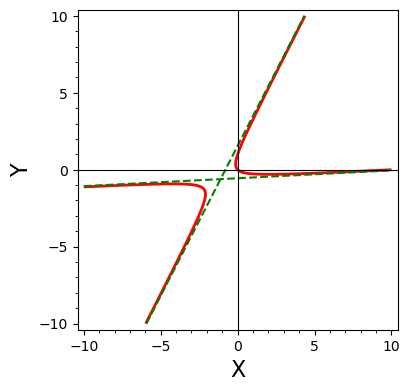

In [30]:
# Зададим отображаемую область значений и область определения
x_range = (-10, 10)
y_range = (-10, 10)

# Отрисуем заданную кривую
plt = implicit_plot(curve, x_range, y_range, color="red", linewidth=2)
for equation in asymptotes:
    plt += implicit_plot(y == equation, x_range, y_range, linestyle='--', color="green")
plt.show(axes=True, axes_labels=["X", "Y"])

# Зеленый пунктир - асимптоты, красные неприрывные линии - исходная кривая

Осталось только найти точку пересечения ассимптот:

In [31]:
# Приравниваем уравнениях двух асимптот, получаем координату х пересечения
cross_x = solve(asymptotes[0] == asymptotes[1], x)[0].right()

# В любое из двух уравнений подставим координату пересечения х и 
# находим координату пересечения y
cross_y = asymptotes[0]

# Вывод в консоль
output = f"Точка пересечения асимптот: ({cross_x.n():.5f}, {cross_y(cross_x).n():.5f})"
print(output)

Точка пересечения асимптот: (-1.11111, -0.61111)


Теперь построим график заданной поверхности второго порядка

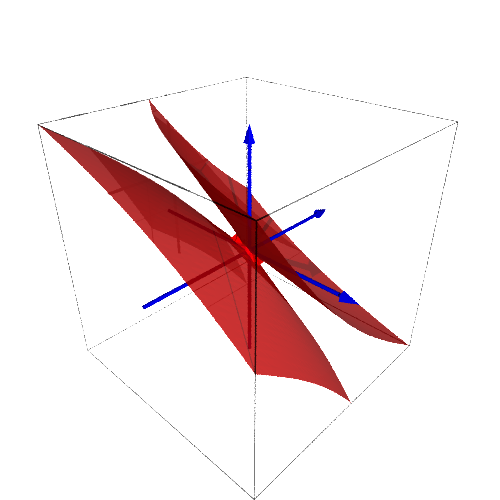

In [32]:
# Отображаемые области переменных
x_range = (-10, 10)
y_range = (-10, 10)
z_range = (-10, 10)

# Отрисуем заданную кривую
plt = implicit_plot3d(surface, x_range, y_range, z_range, adaptive=True, 
                    color='red', opacity='0.9')
plt.show(axes=True, viewer='tachyon')

## Пункт 3.
_Привести аналитически (например, методом ортагонального преобразования) квадратичные формы, описывающие кривую и поверхность второго порядка к каноническому виду._

Для удобной работы с уравнением кривой второго порядка, само уравнения надо представить в виде суммы некоей квадратичной формы и линейного функционала. В данном случае часть уравнения, являющаяся КФ имеет вид:
                           $$ 14x^2 - 7y^2 + 20xy $$
Линейная часть выглядит так:
 $$ 8x + 34y $$
Введем теперь вектор $v$:
$$ v = v_e = (x, y)^T $$
Тогда если обозначить матрицу квадратичной формы за $Q$, а матрицу линейного функционала за $L$, то наше уравнение примет следующий вид:
$$ v^T * Q * v + L*v = 35$$

Ваша текущая задача заключается в том, чтобы составить матрицы Q и L:
(Замечание: в SageMath существует объект QuadraticForm, который позволяет работать не с абстрактными матрицами, а с матрицами именно квадратичной формы. Решение, реализованное не по шаблону, с использованием QuadraticForm также будет приниматься, но рассматриваться в ноутбуке не будет).

In [33]:
# Кривая
# КФ: - 1/10 * x^2 + y^2 - 2xy
curve_Q = matrix([[-1/10, -1],
                  [-1,1]])

# Линейная часть: - x - y
curve_L = matrix([-1, -1])


# Поверхность
# КФ: 2x^2 + 11y^2 + 11z^2 + 12xy + 12xz + 24yz
surface_Q = matrix([[2,6,6], 
                    [6,11,12],
                    [6,12,11]])

# Линейная часть, равная нулю
surface_L = matrix([0, 0, 0])

Теперь нам нужно диагонализировать матрицу КФ: для этого нам нужно перейти из стандартного базиса к базису из собственных векторов. Следовательно, следует найти собственные числа и векторы матрицы $Q$:

In [35]:
# Кривая
eigen_info = curve_Q.eigenvectors_right()
curve_eig_inf = []
print(f"Собственные числа и вектора для КФ кривой:")
for eig_val, eig_vec, _ in eigen_info:
    eig_vec = eig_vec[0]
    print(f"Число: {eig_val}  Вектор: {eig_vec}")
    curve_eig_inf.append((eig_val, eig_vec))


# Поверхность
eigen_info = surface_Q.eigenvectors_right()
surface_eig_inf = []
print(f"\nСобственные числа и вектора для КФ поверхности:")
for eig_val, eig_vecs, _ in eigen_info:
    for eig_vec in eig_vecs:
        print(f"Число: {eig_val}  Вектор: {eig_vec}")
        surface_eig_inf.append((eig_val, eig_vec))

Собственные числа и вектора для КФ кривой:
Число: -0.6912712210513327?  Вектор: (1, 0.5912712210513327?)
Число: 1.591271221051333?  Вектор: (1, -1.691271221051333?)

Собственные числа и вектора для КФ поверхности:
Число: 26  Вектор: (1, 2, 2)
Число: -1  Вектор: (1, 0, -1/2)
Число: -1  Вектор: (0, 1, -1)


Получив собственные векторы матрицы можно задать матрицу перехода от стандартного базиса в $R^2$ к базису из собственных векторов. Запишите матрицу перехода, составив ее из собственных векторов и при необходимости избавившись от дробей в векторах (вектора следует нормировать):

In [36]:
# Поиск матрицы перехода для кривой
first_eig_vec, second_eig_vec = curve_eig_inf[0][1], curve_eig_inf[1][1]
first_eig_vec /= first_eig_vec.norm()
second_eig_vec /= second_eig_vec.norm()
transition_matrix_curve = matrix([[first_eig_vec[0], second_eig_vec[0]],
                                  [first_eig_vec[1], second_eig_vec[1]]]).n()
print(transition_matrix_curve, "\n")

# Поиск матрицы перехода для поверхности
first_eig_vec, second_eig_vec = surface_eig_inf[0][1], surface_eig_inf[1][1]
third_eig_vec                 = surface_eig_inf[2][1]

first_eig_vec /= first_eig_vec.norm()
second_eig_vec /= second_eig_vec.norm()
third_eig_vec /= third_eig_vec.norm()

transition_matrix_surface = matrix([[first_eig_vec[0], second_eig_vec[0], third_eig_vec[0]], 
                                    [first_eig_vec[1], second_eig_vec[1], third_eig_vec[1]],
                                    [first_eig_vec[2], second_eig_vec[2], third_eig_vec[2]]]).n() 
print(transition_matrix_surface)

[ 0.860789971413514  0.508960337466410]
[ 0.508960337466410 -0.860789971413514] 

[ 0.333333333333333  0.894427190999916  0.000000000000000]
[ 0.666666666666667  0.000000000000000  0.707106781186548]
[ 0.666666666666667 -0.447213595499958 -0.707106781186548]


Теперь проверьте равенство норм обоих собственных векторов (обратите внимение, здесь используется стандартная евклидова, т.е. вторая, норма):

In [37]:
print(transition_matrix_curve[0].norm() == transition_matrix_curve.norm())
print(transition_matrix_surface[0].norm() == transition_matrix_surface[1].norm() == \
      transition_matrix_surface[2].norm())

True
False


Перепишем теперь матрицу $Q$ в новом базисе:

In [38]:
curve_q_new_basis   = transition_matrix_curve.inverse() * curve_Q \
* transition_matrix_curve
surface_q_new_basis = transition_matrix_surface.inverse() * surface_Q \
* transition_matrix_surface

curve_q_new_basis, surface_q_new_basis

(
[  -0.691271221051333 3.33066907387547e-16]
[3.33066907387547e-16     1.59127122105133],

[     26.0000000000000     0.000000000000000     0.000000000000000]
[ 2.49800180540660e-16     -1.00000000000000  3.33066907387547e-16]
[-8.88178419700125e-16     0.000000000000000    -0.999999999999999]
)

Теперь подставим полученные переменные в наше исходное уравнение:

In [39]:
# Кривая
V = matrix([[x], [y]])
curve_new = (V.T*curve_q_new_basis*V + curve_L*V).expand()[0][0] == 0

# Поверхность
V = matrix([[x], [y], [z]])
surface_new = (V.T*surface_q_new_basis*V + surface_L*V).expand()[0][0] == 0

print(curve_new)
print(surface_new)

-0.691271221051333*x^2 + (6.66133814775094e-16)*x*y + 1.59127122105133*y^2 - x - y == 0
26.0000000000000*x^2 + (2.49800180540660e-16)*x*y - 1.00000000000000*y^2 - (8.88178419700125e-16)*x*z + (3.33066907387547e-16)*y*z - 0.999999999999999*z^2 == 0


Для проверки решения снова построим график:

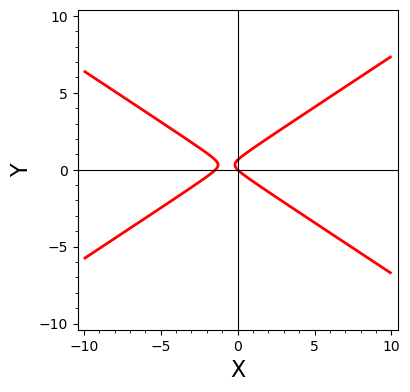

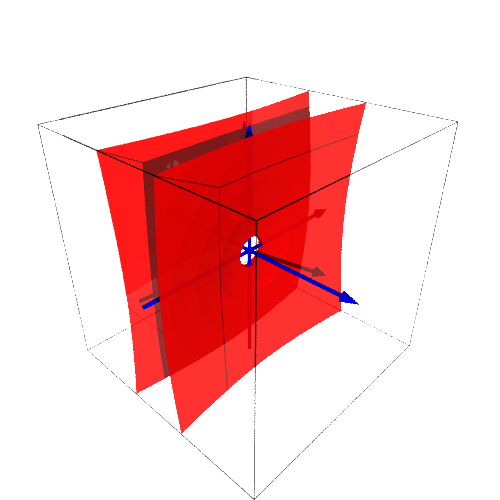

In [40]:
# Кривая
x_range = (-10, 10)
y_range = (-10, 10)

plt = implicit_plot(curve_new, x_range, y_range, color='red', linewidth=2) 
plt.show(axes=True, axes_labels=['X', 'Y'])

# Поверхности
x_range = (-5, 5)
y_range = (-5, 5)
z_range = (-5, 5)

plt = implicit_plot3d(surface_new, x_range, y_range, z_range, adaptive=True, 
                    color='red', opacity='0.9')
plt.show(axes=True, viewer='tachyon')

Если все было сделано верно, то мы должны были добиться поворота графика таким образом, чтобы он стал параллелен одной из осей координат. Остались только последние штрихи: отцентрировать график.

In [42]:
var('k b')

quadratic_form = curve_new.substitute(y=k*x+b)
quadratic_form = quadratic_form.expand()
quadratic_form = quadratic_form.left().collect(x) == quadratic_form.right()

print("\nКвадратичная форма: \n{}".format(quadratic_form))


Квадратичная форма: 
(1.59127122105133*k^2 + (6.66133814775094e-16)*k - 0.691271221051333)*x^2 + 1.59127122105133*b^2 + (3.18254244210267*b*k + (6.66133814775094e-16)*b - k - 1)*x - b == 0


In [43]:
# Коэффициенты при x
square_x_coefficient = qudratic_form.left().coefficient(x^2)
x_coefficient = qudratic_form.left().coefficient(x)

# Вывод в консоль
print("Коэффициент при x^2: {}".format(square_x_coefficient))
print("Коэффициент при x: {}".format(x_coefficient))

Коэффициент при x^2: 1.59127122105133*k^2 + (6.66133814775094e-16)*k - 0.691271221051333
Коэффициент при x: 3.18254244210267*b*k + (6.66133814775094e-16)*b - k - 1


In [44]:
# Приравняем коэффициенты к нулю, получив систему из двух уравнений
equation_square_x = square_x_coefficient == 0
equation_x        = x_coefficient        == 0

# Решим систему линейных уравнений
solutions = solve([equation_square_x, equation_x], k, b)

# Выведем в консоль решения данной системы
for index, solution in enumerate(solutions):
    output = f"Sol #{index+1}: {solution[0].left()} = {solution[0].right()}, {solution[1].left()} = {solution[1].right()}"
    print(output)

Sol #1: k = -7/1828897115554791088867358753724444496162171080190*sqrt(29654235912160944859386287986095478073148236936714981416113304210805215445907885912823722737679) - 34727721/165916282207225218543590, b = -5437556677952/1964144811959464929925736062000828332176139631326220859073755*sqrt(29654235912160944859386287986095478073148236936714981416113304210805215445907885912823722737679) + 617162173856754926567092817075640523357600053732418245637504/1964144811959464929925736062000828332176139631326220859073755
Sol #2: k = 7/1828897115554791088867358753724444496162171080190*sqrt(29654235912160944859386287986095478073148236936714981416113304210805215445907885912823722737679) - 34727721/165916282207225218543590, b = 5437556677952/1964144811959464929925736062000828332176139631326220859073755*sqrt(29654235912160944859386287986095478073148236936714981416113304210805215445907885912823722737679) + 617162173856754926567092817075640523357600053732418245637504/1964144811959464929925736062000828332176

In [45]:
# Сформируем уравнения асимптот
asymptotes = [solution[0].right()*x + solution[1].right() for solution in solutions]

# Выведем их в консоль
for index, asymptote in enumerate(asymptotes):
    output = f"Asympt #{index+1}: y = {asymptote}"
    print(output)

Asympt #1: y = -7/1828897115554791088867358753724444496162171080190*x*(sqrt(29654235912160944859386287986095478073148236936714981416113304210805215445907885912823722737679) + 54686296281264553873793771653323) - 5437556677952/1964144811959464929925736062000828332176139631326220859073755*sqrt(29654235912160944859386287986095478073148236936714981416113304210805215445907885912823722737679) + 617162173856754926567092817075640523357600053732418245637504/1964144811959464929925736062000828332176139631326220859073755
Asympt #2: y = 7/1828897115554791088867358753724444496162171080190*x*(sqrt(29654235912160944859386287986095478073148236936714981416113304210805215445907885912823722737679) - 54686296281264553873793771653323) + 5437556677952/1964144811959464929925736062000828332176139631326220859073755*sqrt(29654235912160944859386287986095478073148236936714981416113304210805215445907885912823722737679) + 617162173856754926567092817075640523357600053732418245637504/19641448119594649299257360620008283

In [46]:
# Приравниваем уравнениях двух асимптот, получаем координату х пересечения
cross_x = solve(asymptotes[0] == asymptotes[1], x)[0].right()

# В любое из двух уравнений подставим координату пересечения х и 
# находим координату пересечения y
cross_y = asymptotes[0]

# Вывод в консоль
output = f"Точка пересечения асимптот: ({cross_x.n():.5f}, {cross_y(cross_x).n():.5f})"
print(output)

Точка пересечения асимптот: (-0.72331, 0.31421)


Теперь путем параллельного переноса отцентрируем график гиперболы:

**Замечание.** Сдвигать надо на значение х и у, полученные полученные в предыдущем шаге(точки пересечения ассимптот функции после поворота)

In [49]:
# Центрируем
curve_centered = curve_new.substitute(x=x+cross_x.n(), y=y+cross_y(cross_x).n())

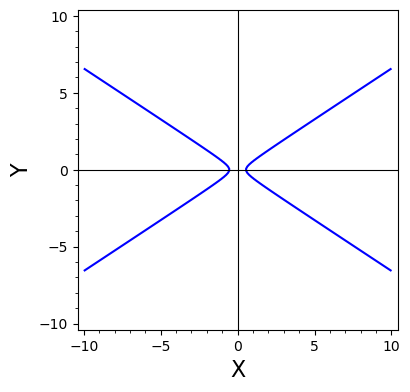

In [50]:
# Рисуем график
# Зададим отображаемую область значений и область определения
x_range = (-10, 10)
y_range = (-10, 10)

# Отрисуем заданную кривую
plt = implicit_plot(curve_centered, x_range, y_range)
plt.show(axes=True, axes_labels=["X", "Y"])